In [2]:
import fsspec
import os
import yaml

import matplotlib.pyplot as plt

In [9]:
rundirs_ml_tq = [
    {
        "url": "gs://vcm-ml-experiments/n2f-pire-stable-ml/2022-07-08/decrease-rad-lr-updated-rad-flux-seed-0/fv3gfs_run",
        "name": "ML-Tq-0"
    },
    {
        "url": "gs://vcm-ml-experiments/n2f-pire-stable-ml/2022-07-08/decrease-rad-lr-updated-rad-flux-seed-1/fv3gfs_run",
        "name": "ML-Tq-1"
    },
    {
        "url": "gs://vcm-ml-experiments/n2f-pire-stable-ml/2022-07-08/decrease-rad-lr-updated-rad-flux-seed-2/fv3gfs_run",
        "name": "ML-Tq-2"
    },
    {
        "url": "gs://vcm-ml-experiments/n2f-pire-stable-ml/2022-07-08/decrease-rad-lr-updated-rad-flux-seed-3/fv3gfs_run",
        "name": "ML-Tq-3"
    }
]

rundirs_ml_tquv = [
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-11/oos-full-year-sweep-n2pire-consistent-ocsvm-large-gamma-0-default-0-trial1/fv3gfs_run",
      "name": "ML-Tquv-0"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-18/ml-tquv-seed-1/fv3gfs_run",
      "name": "ML-Tquv-1"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-18/ml-tquv-seed-2/fv3gfs_run",
      "name": "ML-Tquv-2"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-18/ml-tquv-seed-3/fv3gfs_run",
      "name": "ML-Tquv-3"
    }
  ]



rundirs_ml_tq_tapered_tq = [   
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-03-06/ml-tapered-all-tq-seed-0/fv3gfs_run",
      "name": "ML-Tq-0-tapered-tq"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-03-06/ml-tapered-all-tq-seed-1/fv3gfs_run",
      "name": "ML-Tq-1-tapered-tq"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-03-06/ml-tapered-all-tq-seed-2/fv3gfs_run",
      "name": "ML-Tq-2-tapered-tq"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-03-06/ml-tapered-all-tq-seed-3/fv3gfs_run",
      "name": "ML-Tq-3-tapered-tq"
    }
]

rundirs_ml_tquv_tapered_tquv = [
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-25/ml-tapered-all-tquv-seed-0/fv3gfs_run",
      "name": "ML-Tquv-0-tapered-tquv"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-25/ml-tapered-all-tquv-seed-1/fv3gfs_run",
      "name": "ML-Tquv-1-tapered-tquv"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-25/ml-tapered-all-tquv-seed-2/fv3gfs_run",
      "name": "ML-Tquv-2-tapered-tquv"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-25/ml-tapered-all-tquv-seed-3/fv3gfs_run",
      "name": "ML-Tquv-3-tapered-tquv"
    }
]


rundirs_ml_tquv_tapered_tquv_ocsvm_tq = [
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-tq-0-default-0-trial0/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-0"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-tq-0-default-0-trial1/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-1"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-tq-0-default-0-trial2/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-2"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-tq-0-default-0-trial3/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-3"
    }
]


In [3]:


"""

rundirs_ml_tquv_ocsvm_tq = [
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-11/oos-full-year-sweep-n2pire-consistent-ocsvm-tq-larger-gamma-0-default-0-trial1/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-Tq-0"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-17/oos-full-year-sweep-n2pire-consistent-ocsvm-tq-0-default-0-trial1/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-Tq-1"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-17/oos-full-year-sweep-n2pire-consistent-ocsvm-tq-0-default-0-trial2/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-Tq-2"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-17/oos-full-year-sweep-n2pire-consistent-ocsvm-tq-0-default-0-trial3/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-Tq-3"
    }
  ]
  
rundirs_ml_tquv_tapered_tquv_minmax_t = [
   {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-minmax-0-default-0-trial0/fv3gfs_run",
      "name": "ML-tapered-Tquv-minmax-T-seed-0"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-minmax-0-default-0-trial1/fv3gfs_run",
      "name": "ML-tapered-Tquv-minmax-T-seed-1"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-minmax-0-default-0-trial2/fv3gfs_run",
      "name": "ML-tapered-Tquv-minmax-T-seed-2"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-minmax-0-default-0-trial3/fv3gfs_run",
      "name": "ML-tapered-Tquv-minmax-T-seed-3"
    }    
]

rundirs_ml_tquv_tapered_tquv_ocsvm_t = [
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-t-0-default-0-trial0/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-0"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-t-0-default-0-trial1/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-1"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-t-0-default-0-trial2/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-2"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-24/oos-tapered-tquv-nd-ocsvm-t-0-default-0-trial3/fv3gfs_run",
      "name": "ML-tapered-Tquv-OCSVM-T-seed-3"
    }
]



rundirs_ml_tquv_ocsvm_t = [
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-11/oos-full-year-sweep-n2pire-consistent-ocsvm-large-gamma-0-default-0-trial1/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-T-0"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-17/oos-full-year-sweep-n2pire-consistent-ocsvm-t-0-default-0-trial1/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-T-1"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-17/oos-full-year-sweep-n2pire-consistent-ocsvm-t-0-default-0-trial2/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-T-2"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-17/oos-full-year-sweep-n2pire-consistent-ocsvm-t-0-default-0-trial3/fv3gfs_run",
      "name": "ML-Tquv-OCSVM-T-3"
    }
  ]

rundirs_ml_tquv_tapered_tq = [
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-20/ml-taper-tquv-seed-0/fv3gfs_run",
      "name": "ML-Tquv-0-tapered-tq"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-20/ml-taper-tquv-seed-1/fv3gfs_run",
      "name": "ML-Tquv-1-tapered-tq"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-20/ml-taper-tquv-seed-2/fv3gfs_run",
      "name": "ML-Tquv-2-tapered-tq"
    },
    {
      "url": "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-20/ml-taper-tquv-seed-3/fv3gfs_run",
      "name": "ML-Tquv-3-tapered-tq"
    }
  ]
"""

In [4]:
"""good_old_run_url = \
    "gs://vcm-ml-experiments/out-of-sample-right-side-up-winds/2023-01-04/oos-full-year-sweep-ocsvm-tq-larger-gamma-0-default-0-trial1/fv3gfs_run_diagnostics/metrics.json"
with fsspec.open(good_old_run_url, 'r') as f:
    good_old_run_metrics = yaml.safe_load(f)"""

In [5]:
baseline_url = "gs://vcm-ml-experiments/claytons/2022-08-10/baseline-trial2/fv3gfs_run_diagnostics/metrics.json"

with fsspec.open(baseline_url, 'r') as f:
    baseline_metrics = yaml.safe_load(f)

In [6]:
def load_metrics(rundirs):
    metrics = {}
    for rundir_seed in rundirs:
        metrics_url = f"{rundir_seed['url'].rstrip('/')}_diagnostics/metrics.json"
        label = rundir_seed['name']
        with fsspec.open(metrics_url, 'r') as f:
            metrics[label] = yaml.safe_load(f)
    return metrics

In [118]:
metrics = {
    "ml_tq": load_metrics(rundirs_ml_tq),
    "ml_tquv": load_metrics(rundirs_ml_tquv),
    

    "ml_tquv_ocsvm_t": load_metrics(rundirs_ml_tquv_ocsvm_t ),
    "ml_tquv_ocsvm_tq": load_metrics(rundirs_ml_tquv_ocsvm_tq ),
    "ml_tquv_minmax_t": load_metrics(rundirs_ml_tquv_minmax_t),
    
}


In [24]:
key_metrics = [
    'rmse_of_time_mean/tmp200',
    'rmse_of_time_mean/pwat',
    'rmse_of_time_mean_land/total_precip_to_surface',
    'rmse_of_time_mean_land/tmpsfc',
    'rmse_of_time_mean_land/tmp850',
    'time_and_land_mean_bias/total_precip_to_surface',
    'time_and_land_mean_bias/tmpsfc',
    'time_and_land_mean_bias/tmp850'
]

In [27]:
def plot_key_metric(metrics, key_metric, auto_lim=True, zero_line=False, ylim=None, ):
    n_experiments = len(metrics)
    fig = plt.figure(figsize=(16., 2.5))

    x_start, delta_x = 0.9, 1.0
    dot_spacing=0.05

    # left plot: RMSE

    ax = fig.add_subplot(121)
    baseline_value = baseline_metrics[key_metric]['value']
    good_old_run_value = good_old_run_metrics[key_metric]['value']
    ax.plot(
        n_experiments+1,
        baseline_value,
        'o',
        color='r'
    )
    """ax.plot(
        n_experiments+2,
        good_old_run_value,
        '*',
        color='orange'
    )"""
    for label, exp_metrics in metrics.items():
        for i, seed_metrics in enumerate(exp_metrics.values()):
            v = seed_metrics[key_metric]['value']
            units = seed_metrics[key_metric]['units']
            ax.plot(x_start + i * dot_spacing, v, 'o', color='b')
        x_start += 1
    if zero_line==True:
        ax.plot([0, n_experiments+2], [0, 0], '--', linewidth=0.5)
    ax.set_xlim(0., n_experiments+2)
    if auto_lim==True:
        ax.set_ylim(0. , 2*baseline_value)
    if ylim:
        ax.set_ylim(ylim)
    ax.set_xticks(list(range(1, n_experiments+3)))
    ax.set_xticklabels(list(metrics.keys()) + ['baseline',  ], rotation=45, ha='right')
    ax.set_ylabel(units)
    ax.set_title(key_metric)

### Figures

In [31]:

metrics  = {
    "ml_tq": load_metrics(rundirs_ml_tq),
    "ml_tq_tapered_tq":  load_metrics(rundirs_ml_tq_tapered_tq),
    
    "ml_tquv":  load_metrics(rundirs_ml_tquv),
    "ml_tquv_tapered_tquv":  load_metrics(rundirs_ml_tquv_tapered_tquv),
    
    #"ml_tquv_tapered_tquv_minmax_t": load_metrics(rundirs_ml_tquv_tapered_tquv_minmax_t),
    #"ml_tquv_tapered_tquv_ocsvm_t": load_metrics(rundirs_ml_tquv_tapered_tquv_ocsvm_t),
    "ml_tquv_tapered_tquv_ocsvm_tq": load_metrics(rundirs_ml_tquv_tapered_tquv_ocsvm_tq),
}


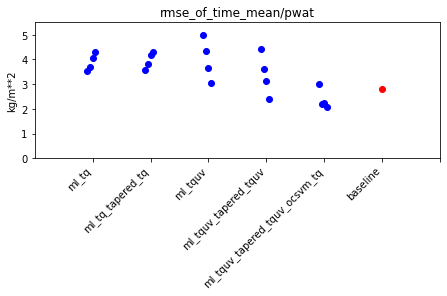

In [35]:
plot_key_metric(metrics_with_tapering, key_metric='rmse_of_time_mean/pwat', ylim=(0, 5.5))

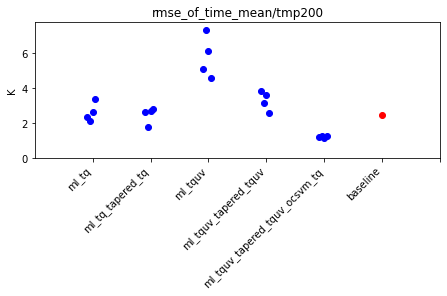

In [36]:
plot_key_metric(metrics_with_tapering, key_metric='rmse_of_time_mean/tmp200', ylim=(0, 7.75))

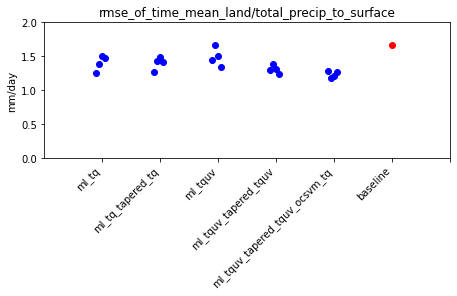

In [37]:
plot_key_metric(metrics_with_tapering, key_metric='rmse_of_time_mean_land/total_precip_to_surface', ylim=(0, 2))

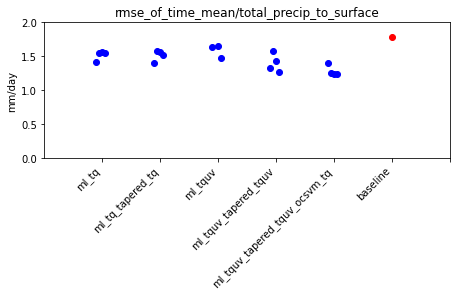

In [38]:
plot_key_metric(metrics_with_tapering, key_metric='rmse_of_time_mean/total_precip_to_surface', ylim=(0, 2))

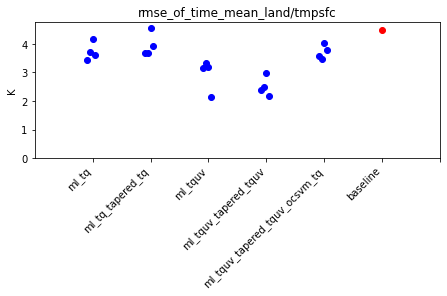

In [39]:
plot_key_metric(metrics_with_tapering, key_metric='rmse_of_time_mean_land/tmpsfc', ylim=(0, 4.75))

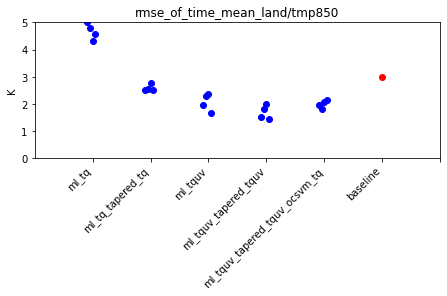

In [40]:
plot_key_metric(metrics_with_tapering, key_metric='rmse_of_time_mean_land/tmp850', ylim=(0, 5))

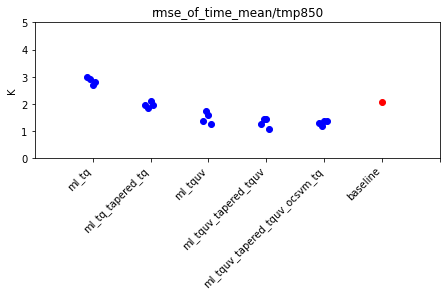

In [41]:
plot_key_metric(metrics_with_tapering, key_metric='rmse_of_time_mean/tmp850', ylim=(0, 5))

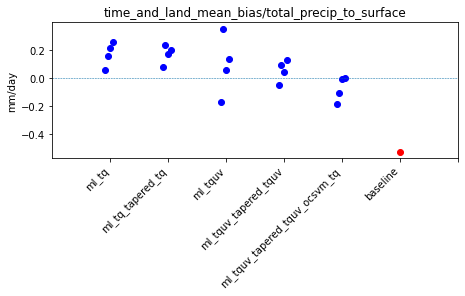

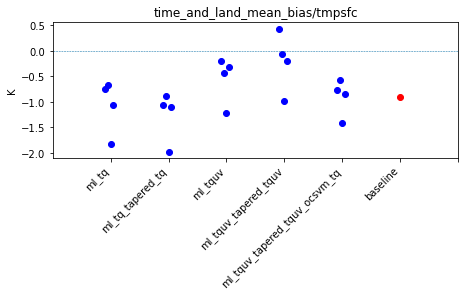

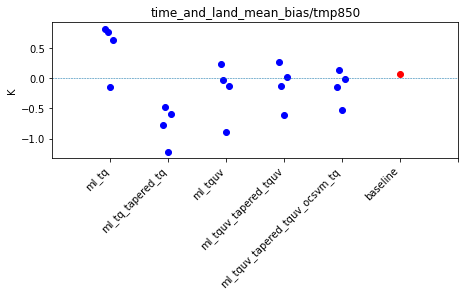

In [43]:
for key_metric in key_metrics[5:]:
    plot_key_metric(metrics_with_tapering, key_metric=key_metric, auto_lim=False, zero_line=True)
    plt.show()

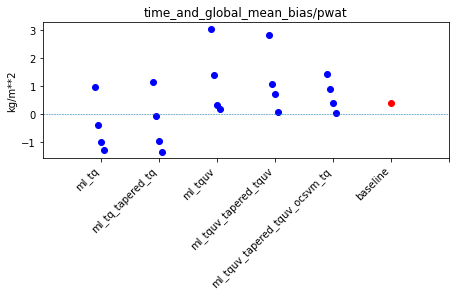

In [44]:
plot_key_metric(metrics_with_tapering, key_metric="time_and_global_mean_bias/pwat", auto_lim=False, zero_line=True)